In [17]:
# !pip install miditime

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from miditime.miditime import MIDITime


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [19]:
anger_data = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_anger.csv')
anger_data

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
0,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,anger
1,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
2,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,anger
3,14270,2017-01-01 00:00:00,2642,1027,12,Resolution3,Type20,Plan4,anger
4,26200,2017-01-01 00:00:00,1154,427,1,Resolution3,Type50,Plan5,anger
...,...,...,...,...,...,...,...,...,...
404950,14300,2019-06-30 00:00:00,874,340,27,Resolution1,Type50,Plan3,anger
404951,26310,2019-06-30 00:00:00,1242,459,19,Resolution1,Type20,Plan4,anger
404952,32260,2019-06-30 00:00:00,159,53,14,Resolution1,Type30,Plan4,anger
404953,32340,2019-06-30 00:00:00,423,164,10,Resolution2,Type20,Plan3,anger


Select a specific Agent

In [20]:
data_agent = anger_data[anger_data['Agent_ID'] == 32400]

### AHT (Average Handle Time) metrics

Average Talk Time across the whole data, this could show us what could be the threshold

Every day in a month

In [21]:
specific_month = '2017-01'  # Change this to your desired month

In [22]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the month and year from 'Call_Date'
data_agent['Month'] = data_agent['Call_Date'].dt.strftime('%Y-%m')

# Convert 'Talk_Time' to numeric in case it's not already
data_agent['Talk_Time'] = pd.to_numeric(data_agent['Talk_Time'])

# Filter the DataFrame for a specific month (e.g., January)

filtered_data = data_agent[data_agent['Month'] == specific_month]

# Group by 'Call_Date' (day) and calculate the average talk time for each day
average_talk_time_by_day = filtered_data.groupby('Call_Date')['Talk_Time'].mean()

# Reset the index to have 'Call_Date' as a regular column
average_talk_time_by_day = average_talk_time_by_day.reset_index()

# Display the result
average_talk_time_by_day

,Call_Date,Talk_Time
0,2017-01-01,778.000000
1,2017-01-02,459.375000
2,2017-01-03,709.500000
3,2017-01-04,683.636364
4,2017-01-07,1114.500000
5,2017-01-08,1002.500000
6,2017-01-09,896.200000
7,2017-01-10,766.500000
8,2017-01-11,646.000000
9,2017-01-14,534.857143


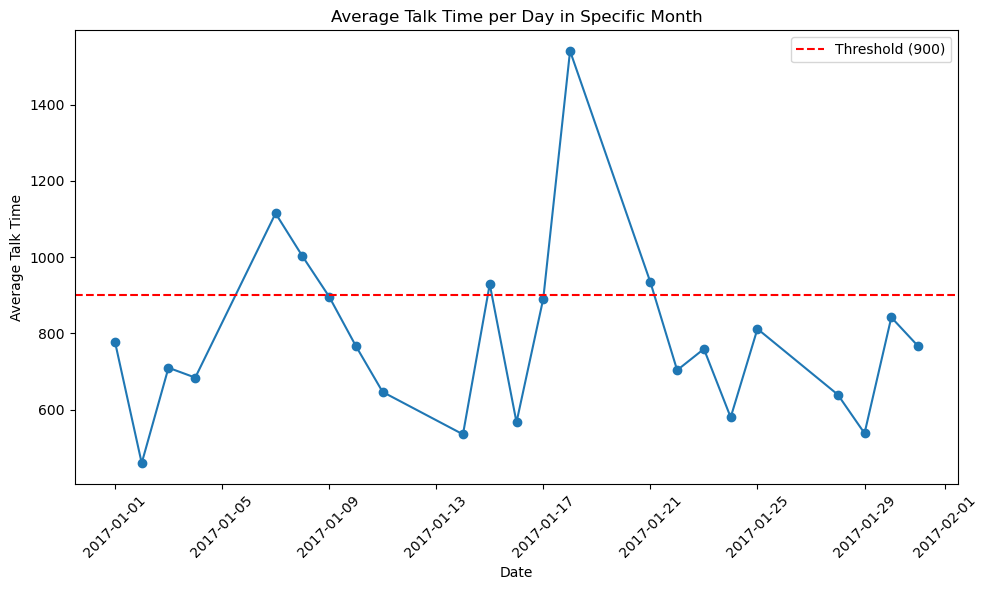

In [23]:
# Assuming you have a DataFrame called average_talk_time_by_day

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(average_talk_time_by_day['Call_Date'], average_talk_time_by_day['Talk_Time'], marker='o', linestyle='-')

# Add a horizontal line for the threshold
threshold = 900
ax.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Average Talk Time')
ax.set_title('Average Talk Time per Day in Specific Month')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

Every Week

In [24]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the week of the year and create a new column 'Week'
data_agent['Week'] = data_agent['Call_Date'].dt.strftime('%U')

# Convert 'Talk_Time' to numeric in case it's not already
data_agent['Talk_Time'] = pd.to_numeric(data_agent['Talk_Time'])

# Group by 'Week' and calculate the average talk time for each week
average_talk_time_by_week = data_agent.groupby('Week')['Talk_Time'].mean()

# Reset the index to have 'Week' as a regular column
average_talk_time_by_week = average_talk_time_by_week.reset_index()

# Display the result
average_talk_time_by_week

,Week,Talk_Time
0,00,754.604167
1,01,639.790476
2,02,750.320000
3,03,725.909910
4,04,676.462963
5,05,613.483146
6,06,725.250000
7,07,696.731959
8,08,668.558824
9,09,678.271028


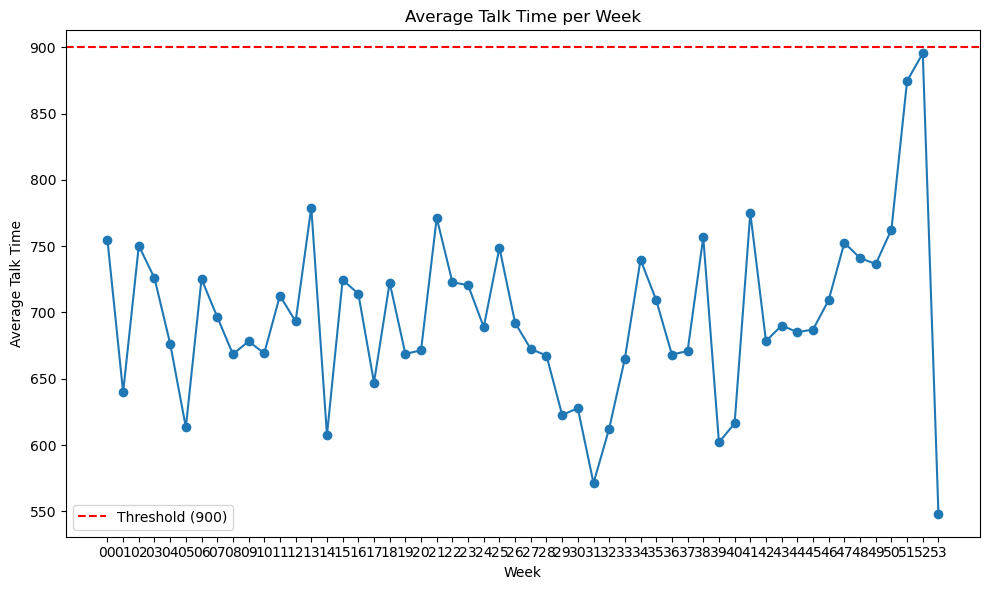

In [25]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(average_talk_time_by_week['Week'], average_talk_time_by_week['Talk_Time'], marker='o', linestyle='-')

# Add a horizontal line for the threshold
threshold = 900
ax.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')

# Set labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Average Talk Time')
ax.set_title('Average Talk Time per Week')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### FCR (First Call Resolution) Metric

Average of Resolution1 across the whole data, this could show us what could be the threshold

Every day in a month

In [26]:
target_year = 2017  # Replace with the year you want
target_month = 1    # Replace with the month you want

In [27]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the year and month from 'Call_Date'
data_agent['Year'] = data_agent['Call_Date'].dt.year
data_agent['Month'] = data_agent['Call_Date'].dt.month

filtered_data = data_agent[(data_agent['Year'] == target_year) & (data_agent['Month'] == target_month)]

# Calculate the total number of calls for each day in the specific month
total_calls_by_day = filtered_data.groupby(filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
total_calls_by_day.columns = ['Day', 'Total Calls']

# Calculate the number of calls with 'Resolution1' for each day in the specific month
resolution1_calls_by_day = filtered_data[filtered_data['Call_resolution_ID'] == 'Resolution1'].groupby(
    filtered_data['Call_Date'].dt.day)['Agent_ID'].count().reset_index()
resolution1_calls_by_day.columns = ['Day', 'Resolution1 Calls']

# Merge the two DataFrames on 'Day'
resolution_percentage_daily_in_a_month_data = pd.merge(total_calls_by_day, resolution1_calls_by_day, on='Day', how='left')

# Fill NaN values with 0 (in case there are days with no 'Resolution1' calls)
resolution_percentage_daily_in_a_month_data['Resolution1 Calls'] = resolution_percentage_daily_in_a_month_data['Resolution1 Calls'].fillna(0)

# Calculate the percentage of 'Resolution1' calls for each day in the specific month
resolution_percentage_daily_in_a_month_data['Resolution1 Percentage'] = (resolution_percentage_daily_in_a_month_data['Resolution1 Calls'] / resolution_percentage_daily_in_a_month_data['Total Calls']) * 100

# Display the result
resolution_percentage_daily_in_a_month_data


,Day,Total Calls,Resolution1 Calls,Resolution1 Percentage
0,1,4,4,100.000000
1,2,8,7,87.500000
2,3,4,4,100.000000
3,4,11,9,81.818182
4,7,6,3,50.000000
5,8,4,2,50.000000
6,9,10,7,70.000000
7,10,8,8,100.000000
8,11,6,4,66.666667
9,14,7,6,85.714286


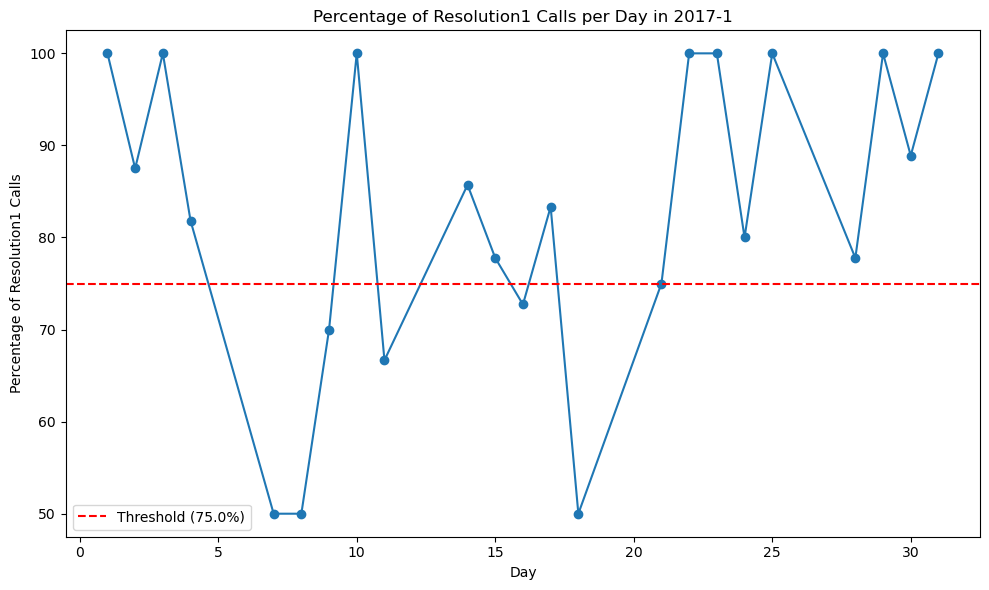

In [28]:
# Assuming you have a DataFrame called resolution_percentage_daily_in_a_month_data

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(resolution_percentage_daily_in_a_month_data['Day'], resolution_percentage_daily_in_a_month_data['Resolution1 Percentage'], marker='o', linestyle='-')

# Add a horizontal line for the threshold
threshold = 0.75
ax.axhline(y=threshold * 100, color='red', linestyle='--', label=f'Threshold ({threshold * 100}%)')

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Percentage of Resolution1 Calls')
ax.set_title(f'Percentage of Resolution1 Calls per Day in {target_year}-{target_month}')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

Every Week

In [29]:
# Assuming your data is stored in a DataFrame called data_agent
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_agent = data_agent.copy()

# Convert 'Call_Date' to a datetime object
data_agent['Call_Date'] = pd.to_datetime(data_agent['Call_Date'])

# Extract the week of the year and create a new column 'Week'
data_agent['Week'] = data_agent['Call_Date'].dt.strftime('%U')

# Calculate the total number of calls for each week
total_calls_by_week = data_agent.groupby('Week').size().reset_index(name='Total Calls')

# Calculate the number of calls with 'Resolution1' for each week
resolution1_calls_by_week = data_agent[data_agent['Call_resolution_ID'] == 'Resolution1'].groupby('Week').size().reset_index(name='Resolution1 Calls')

# Merge the two DataFrames on 'Week'
resolution_percentage_every_week_data = pd.merge(total_calls_by_week, resolution1_calls_by_week, on='Week', how='left')

# Fill NaN values with 0 (in case there are weeks with no 'Resolution1' calls)
resolution_percentage_every_week_data['Resolution1 Calls'] = resolution_percentage_every_week_data['Resolution1 Calls'].fillna(0)

# Calculate the percentage of 'Resolution1' calls for each week
resolution_percentage_every_week_data['Resolution1 Percentage'] = (resolution_percentage_every_week_data['Resolution1 Calls'] / resolution_percentage_every_week_data['Total Calls']) * 100

# Display the result
resolution_percentage_every_week_data


,Week,Total Calls,Resolution1 Calls,Resolution1 Percentage
0,00,48,42,87.500000
1,01,105,83,79.047619
2,02,100,76,76.000000
3,03,111,89,80.180180
4,04,108,94,87.037037
5,05,89,80,89.887640
6,06,104,84,80.769231
7,07,97,81,83.505155
8,08,102,86,84.313725
9,09,107,80,74.766355


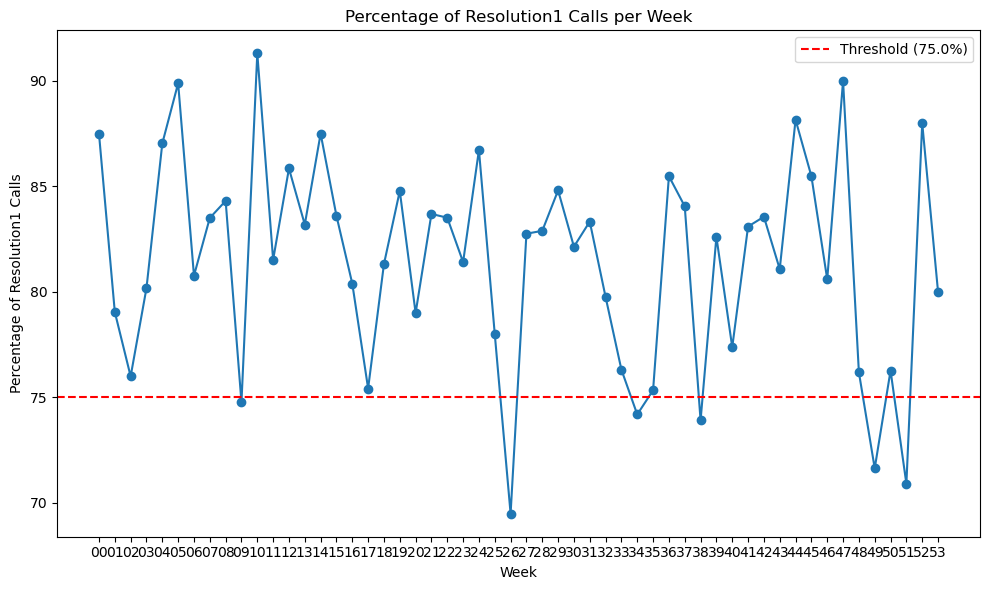

In [30]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(resolution_percentage_every_week_data['Week'], resolution_percentage_every_week_data['Resolution1 Percentage'], marker='o', linestyle='-')

# Add a horizontal line for the threshold
threshold = 0.75
ax.axhline(y=threshold * 100, color='red', linestyle='--', label=f'Threshold ({threshold * 100}%)')

# Set labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Percentage of Resolution1 Calls')
ax.set_title('Percentage of Resolution1 Calls per Week')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()